In [18]:
!pip install google-api-python-client

In [19]:
!pip install python-dotenv

In [20]:
import pandas as pd
df = pd.read_csv("data/labeled_data-1.csv")
df.head()

,Unnamed: 0,class,tweet
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
sampled_df = df.sample(n=250, random_state=42)
sampled_list = sampled_df["tweet"].tolist()
tweets = sampled_df['tweet'].tolist()
labels = sampled_df['class'].tolist()

In [23]:
import perspectives_helper as ph

predictions = ph.predict_batch(tweets)
predictions

KeyboardInterrupt: 

In [ ]:
labels

[1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1]

In [ ]:
import numpy as np

true = np.array(labels)
pred = np.array(predictions)

accuracy = np.mean(true == pred)
print("Accuracy =", accuracy)

Accuracy = 0.852


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(true, pred)
f1_macro = f1_score(true, pred, average="macro")

print("Confusion matrix:\n", cm)
print("Macro F1 =", f1_macro)

Confusion matrix:
 [[  0  15   2]
 [  1 178  14]
 [  0   5  35]]
Macro F1 = 0.5599055675782019


In [ ]:
for cls in [0,1,2]:
    idx = np.where(true == cls)[0]
    acc = np.mean(true[idx] == pred[idx])
    print(f"Class {cls} accuracy: {acc}")


Class 0 accuracy: 0.0
Class 1 accuracy: 0.9222797927461139
Class 2 accuracy: 0.875


In [ ]:
!pip install openai anthropic nest-asyncio matplotlib scipy

In [ ]:
import gpt_helper as gh
import claude_helper as ch

## GPT-5-nano Evaluation

In [ ]:
print("Running GPT-5-nano predictions...")
gpt_predictions = gh.predict_batch(tweets, model="gpt-5-nano-2025-08-07")
print("GPT-5-nano predictions completed!")
gpt_predictions

Running GPT-5-nano predictions...
Processing 250 tweets in 25 batches of up to 10
Running 5 batches concurrently


Processing batches 1-5 of 25...
✓ Batch 4 completed (10 tweets)
✓ Batch 1 completed (10 tweets)
✓ Batch 3 completed (10 tweets)
✓ Batch 2 completed (10 tweets)
✓ Batch 5 completed (10 tweets)

Processing batches 6-10 of 25...
✓ Batch 10 completed (10 tweets)
✓ Batch 7 completed (10 tweets)
✓ Batch 6 completed (10 tweets)
✓ Batch 9 completed (10 tweets)
✓ Batch 8 completed (10 tweets)

Processing batches 11-15 of 25...
✓ Batch 11 completed (10 tweets)
✓ Batch 14 completed (10 tweets)
✓ Batch 12 completed (10 tweets)
✓ Batch 13 completed (10 tweets)
✓ Batch 15 completed (10 tweets)

Processing batches 16-20 of 25...
✓ Batch 18 completed (10 tweets)
✓ Batch 20 completed (10 tweets)
✓ Batch 16 completed (10 tweets)
✓ Batch 17 completed (10 tweets)
✓ Batch 19 completed (10 tweets)

Processing batches 21-25 of 25...
✓ Batch 22 completed (10 tweets)
✓ Batch 21 completed (10 tweet

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1]

In [ ]:
gpt_pred = np.array(gpt_predictions)
gpt_accuracy = np.mean(true == gpt_pred)
gpt_cm = confusion_matrix(true, gpt_pred)
gpt_f1_macro = f1_score(true, gpt_pred, average="macro")

print("GPT-5-nano Results:")
print("=" * 50)
print("Accuracy =", gpt_accuracy)
print("Confusion matrix:\n", gpt_cm)
print("Macro F1 =", gpt_f1_macro)
print("\nPer-class accuracy:")
for cls in [0,1,2]:
    idx = np.where(true == cls)[0]
    acc = np.mean(true[idx] == gpt_pred[idx])
    print(f"Class {cls} accuracy: {acc:.4f}")

GPT-5-nano Results:
Accuracy = 0.764
Confusion matrix:
 [[ 15   1   1]
 [ 42 148   3]
 [  3   9  28]]
Macro F1 = 0.670231003564337

Per-class accuracy:
Class 0 accuracy: 0.8824
Class 1 accuracy: 0.7668
Class 2 accuracy: 0.7000


## Claude-Haiku Evaluation

In [ ]:
print("Running Claude-Haiku predictions...")
claude_predictions = ch.predict_batch(tweets, model="claude-haiku-4-5-20251001")
print("Claude-Haiku predictions completed!")
claude_predictions

Running Claude-Haiku predictions...
Processing 250 tweets in 25 batches of up to 10
Running 5 batches concurrently


Processing batches 1-5 of 25...
✓ Batch 4 completed (10 tweets)
✓ Batch 2 completed (10 tweets)
✓ Batch 3 completed (10 tweets)
✓ Batch 1 completed (10 tweets)
✓ Batch 5 completed (10 tweets)

Processing batches 6-10 of 25...
✓ Batch 6 completed (10 tweets)
✓ Batch 9 completed (10 tweets)
✓ Batch 10 completed (10 tweets)
✓ Batch 8 completed (10 tweets)
✓ Batch 7 completed (10 tweets)

Processing batches 11-15 of 25...
✓ Batch 12 completed (10 tweets)
✓ Batch 11 completed (10 tweets)
✓ Batch 14 completed (10 tweets)
✓ Batch 15 completed (10 tweets)
✓ Batch 13 completed (10 tweets)

Processing batches 16-20 of 25...
✓ Batch 16 completed (10 tweets)
✓ Batch 17 completed (10 tweets)
✓ Batch 18 completed (10 tweets)
✓ Batch 19 completed (10 tweets)
✓ Batch 20 completed (10 tweets)

Processing batches 21-25 of 25...
✓ Batch 24 completed (10 tweets)
✓ Batch 22 completed (10 twe

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 1]

In [ ]:
claude_pred = np.array(claude_predictions)
claude_accuracy = np.mean(true == claude_pred)
claude_cm = confusion_matrix(true, claude_pred)
claude_f1_macro = f1_score(true, claude_pred, average="macro")

print("Claude-Haiku Results:")
print("=" * 50)
print("Accuracy =", claude_accuracy)
print("Confusion matrix:\n", claude_cm)
print("Macro F1 =", claude_f1_macro)
print("\nPer-class accuracy:")
for cls in [0,1,2]:
    idx = np.where(true == cls)[0]
    acc = np.mean(true[idx] == claude_pred[idx])
    print(f"Class {cls} accuracy: {acc:.4f}")

Claude-Haiku Results:
Accuracy = 0.848
Confusion matrix:
 [[ 12   5   0]
 [ 16 167  10]
 [  3   4  33]]
Macro F1 = 0.7334432581273603

Per-class accuracy:
Class 0 accuracy: 0.7059
Class 1 accuracy: 0.8653
Class 2 accuracy: 0.8250


## Comparative Analysis

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Perspectives API', 'GPT-5-nano', 'Claude-Haiku'],
    'Accuracy': [accuracy, gpt_accuracy, claude_accuracy],
    'Macro F1': [f1_macro, gpt_f1_macro, claude_f1_macro],
    'Class 0 Acc': [
        np.mean(true[np.where(true == 0)[0]] == pred[np.where(true == 0)[0]]),
        np.mean(true[np.where(true == 0)[0]] == gpt_pred[np.where(true == 0)[0]]),
        np.mean(true[np.where(true == 0)[0]] == claude_pred[np.where(true == 0)[0]])
    ],
    'Class 1 Acc': [
        np.mean(true[np.where(true == 1)[0]] == pred[np.where(true == 1)[0]]),
        np.mean(true[np.where(true == 1)[0]] == gpt_pred[np.where(true == 1)[0]]),
        np.mean(true[np.where(true == 1)[0]] == claude_pred[np.where(true == 1)[0]])
    ],
    'Class 2 Acc': [
        np.mean(true[np.where(true == 2)[0]] == pred[np.where(true == 2)[0]]),
        np.mean(true[np.where(true == 2)[0]] == gpt_pred[np.where(true == 2)[0]]),
        np.mean(true[np.where(true == 2)[0]] == claude_pred[np.where(true == 2)[0]])
    ]
})

print("\nComparative Results:")
print("=" * 80)
print(results_df.to_string(index=False))


Comparative Results:
           Model  Accuracy  Macro F1  Class 0 Acc  Class 1 Acc  Class 2 Acc
Perspectives API     0.852  0.559906     0.000000     0.922280        0.875
      GPT-5-nano     0.764  0.670231     0.882353     0.766839        0.700
    Claude-Haiku     0.848  0.733443     0.705882     0.865285        0.825


# Multi-Iteration Experiment (5 Runs)

Run the experiment 5 times with different random samples to get more robust statistical results.

In [24]:
# Run 5 iterations of the experiment
num_iterations = 5
all_results = []

for iteration in range(num_iterations):
    print(f"\n{'='*80}")
    print(f"ITERATION {iteration + 1}/{num_iterations}")
    print(f"{'='*80}\n")
    
    # Sample 250 tweets with different random state for each iteration
    random_state = 42 + iteration
    sampled_df_iter = df.sample(n=250, random_state=random_state)
    tweets_iter = sampled_df_iter['tweet'].tolist()
    labels_iter = sampled_df_iter['class'].tolist()
    true_iter = np.array(labels_iter)
    
    print(f"Sampled 250 tweets (random_state={random_state})")
    print(f"Class distribution: {np.bincount(true_iter)}\n")
    
    # Run Perspectives API
    print("--- Perspectives API ---")
    perspectives_pred_iter = ph.predict_batch(tweets_iter)
    perspectives_pred_iter = np.array(perspectives_pred_iter)
    
    # Run GPT-5-nano
    print("\n--- GPT-5-nano ---")
    gpt_pred_iter = np.array(gh.predict_batch(tweets_iter, model="gpt-5-nano-2025-08-07"))
    
    # Run Claude-Haiku
    print("\n--- Claude-Haiku ---")
    claude_pred_iter = np.array(ch.predict_batch(tweets_iter, model="claude-haiku-4-5-20251001"))
    
    # Calculate metrics for this iteration
    iteration_results = {
        'iteration': iteration + 1,
        'random_state': random_state,
        'true_labels': true_iter,
        'perspectives': {
            'predictions': perspectives_pred_iter,
            'accuracy': np.mean(true_iter == perspectives_pred_iter),
            'f1_macro': f1_score(true_iter, perspectives_pred_iter, average="macro"),
            'confusion_matrix': confusion_matrix(true_iter, perspectives_pred_iter),
            'class_0_acc': np.mean(true_iter[true_iter == 0] == perspectives_pred_iter[true_iter == 0]) if np.sum(true_iter == 0) > 0 else 0,
            'class_1_acc': np.mean(true_iter[true_iter == 1] == perspectives_pred_iter[true_iter == 1]) if np.sum(true_iter == 1) > 0 else 0,
            'class_2_acc': np.mean(true_iter[true_iter == 2] == perspectives_pred_iter[true_iter == 2]) if np.sum(true_iter == 2) > 0 else 0,
        },
        'gpt': {
            'predictions': gpt_pred_iter,
            'accuracy': np.mean(true_iter == gpt_pred_iter),
            'f1_macro': f1_score(true_iter, gpt_pred_iter, average="macro"),
            'confusion_matrix': confusion_matrix(true_iter, gpt_pred_iter),
            'class_0_acc': np.mean(true_iter[true_iter == 0] == gpt_pred_iter[true_iter == 0]) if np.sum(true_iter == 0) > 0 else 0,
            'class_1_acc': np.mean(true_iter[true_iter == 1] == gpt_pred_iter[true_iter == 1]) if np.sum(true_iter == 1) > 0 else 0,
            'class_2_acc': np.mean(true_iter[true_iter == 2] == gpt_pred_iter[true_iter == 2]) if np.sum(true_iter == 2) > 0 else 0,
        },
        'claude': {
            'predictions': claude_pred_iter,
            'accuracy': np.mean(true_iter == claude_pred_iter),
            'f1_macro': f1_score(true_iter, claude_pred_iter, average="macro"),
            'confusion_matrix': confusion_matrix(true_iter, claude_pred_iter),
            'class_0_acc': np.mean(true_iter[true_iter == 0] == claude_pred_iter[true_iter == 0]) if np.sum(true_iter == 0) > 0 else 0,
            'class_1_acc': np.mean(true_iter[true_iter == 1] == claude_pred_iter[true_iter == 1]) if np.sum(true_iter == 1) > 0 else 0,
            'class_2_acc': np.mean(true_iter[true_iter == 2] == claude_pred_iter[true_iter == 2]) if np.sum(true_iter == 2) > 0 else 0,
        }
    }
    
    all_results.append(iteration_results)
    
    print(f"\n✓ Iteration {iteration + 1} completed!")
    print(f"  Perspectives: {iteration_results['perspectives']['accuracy']:.3f} accuracy")
    print(f"  GPT-5-nano:   {iteration_results['gpt']['accuracy']:.3f} accuracy")
    print(f"  Claude-Haiku: {iteration_results['claude']['accuracy']:.3f} accuracy")

print(f"\n{'='*80}")
print(f"ALL {num_iterations} ITERATIONS COMPLETED!")
print(f"{'='*80}")


ITERATION 1/5

Sampled 250 tweets (random_state=42)
Class distribution: [ 17 193  40]

--- Perspectives API ---

--- GPT-5-nano ---
Processing 250 tweets in 25 batches of up to 10
Running 5 batches concurrently


Processing batches 1-5 of 25...
✓ Batch 3 completed (10 tweets)
✓ Batch 4 completed (10 tweets)
✓ Batch 1 completed (10 tweets)
✓ Batch 2 completed (10 tweets)
✓ Batch 5 completed (10 tweets)

Processing batches 6-10 of 25...
✓ Batch 10 completed (10 tweets)
✓ Batch 7 completed (10 tweets)
✓ Batch 9 completed (10 tweets)
✓ Batch 6 completed (10 tweets)
✓ Batch 8 completed (10 tweets)

Processing batches 11-15 of 25...
✓ Batch 12 completed (10 tweets)
✓ Batch 15 completed (10 tweets)
✓ Batch 13 completed (10 tweets)
✓ Batch 11 completed (10 tweets)
✓ Batch 14 completed (10 tweets)

Processing batches 16-20 of 25...
✓ Batch 18 completed (10 tweets)
✓ Batch 20 completed (10 tweets)
✓ Batch 17 completed (10 tweets)
✓ Batch 16 completed (10 tweets)
✓ Batch 19 completed (10 tweets)

## Iteration-by-Iteration Results

In [25]:
# Display results for each iteration
iteration_data = []

for result in all_results:
    iteration_data.append({
        'Iteration': result['iteration'],
        'Random State': result['random_state'],
        'Perspectives Acc': f"{result['perspectives']['accuracy']:.4f}",
        'Perspectives F1': f"{result['perspectives']['f1_macro']:.4f}",
        'GPT Acc': f"{result['gpt']['accuracy']:.4f}",
        'GPT F1': f"{result['gpt']['f1_macro']:.4f}",
        'Claude Acc': f"{result['claude']['accuracy']:.4f}",
        'Claude F1': f"{result['claude']['f1_macro']:.4f}",
    })

iteration_df = pd.DataFrame(iteration_data)
print("Results Across All Iterations:")
print("="*100)
print(iteration_df.to_string(index=False))
print("="*100)

Results Across All Iterations:
 Iteration  Random State Perspectives Acc Perspectives F1 GPT Acc GPT F1 Claude Acc Claude F1
         1            42           0.8520          0.5599  0.7880 0.6939     0.8480    0.7334
         2            43           0.8280          0.6003  0.7280 0.6246     0.8240    0.6907
         3            44           0.7960          0.5181  0.7680 0.6820     0.8080    0.7039
         4            45           0.8480          0.6287  0.7520 0.6121     0.7960    0.6556
         5            46           0.8400          0.6486  0.7360 0.6505     0.8320    0.7149


## Aggregate Statistics (Mean ± Std)

In [26]:
# Calculate mean and standard deviation for each model
models = ['perspectives', 'gpt', 'claude']
model_names = ['Perspectives API', 'GPT-5-nano', 'Claude-Haiku']

aggregate_stats = []

for model, model_name in zip(models, model_names):
    accuracies = [r[model]['accuracy'] for r in all_results]
    f1_scores = [r[model]['f1_macro'] for r in all_results]
    class_0_accs = [r[model]['class_0_acc'] for r in all_results]
    class_1_accs = [r[model]['class_1_acc'] for r in all_results]
    class_2_accs = [r[model]['class_2_acc'] for r in all_results]
    
    aggregate_stats.append({
        'Model': model_name,
        'Accuracy': f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        'Macro F1': f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        'Class 0 (Hate) Acc': f"{np.mean(class_0_accs):.4f} ± {np.std(class_0_accs):.4f}",
        'Class 1 (Offensive) Acc': f"{np.mean(class_1_accs):.4f} ± {np.std(class_1_accs):.4f}",
        'Class 2 (Neither) Acc': f"{np.mean(class_2_accs):.4f} ± {np.std(class_2_accs):.4f}",
    })

aggregate_df = pd.DataFrame(aggregate_stats)
print("\nAggregate Statistics Across 5 Iterations:")
print("="*120)
print(aggregate_df.to_string(index=False))
print("="*120)


Aggregate Statistics Across 5 Iterations:
           Model        Accuracy        Macro F1 Class 0 (Hate) Acc Class 1 (Offensive) Acc Class 2 (Neither) Acc
Perspectives API 0.8328 ± 0.0201 0.5911 ± 0.0471    0.1058 ± 0.0917         0.8885 ± 0.0188       0.8653 ± 0.0154
      GPT-5-nano 0.7544 ± 0.0217 0.6526 ± 0.0316    0.8833 ± 0.0577         0.7679 ± 0.0219       0.6347 ± 0.0393
    Claude-Haiku 0.8216 ± 0.0182 0.6997 ± 0.0261    0.6836 ± 0.0614         0.8370 ± 0.0229       0.8036 ± 0.0136


## Aggregated Confusion Matrices

In [27]:
# Sum confusion matrices across all iterations
for model, model_name in zip(models, model_names):
    aggregated_cm = sum([r[model]['confusion_matrix'] for r in all_results])
    
    print(f"\n{model_name} - Aggregated Confusion Matrix (sum of all 5 iterations):")
    print("="*60)
    print(aggregated_cm)
    print("\nRows = True labels, Columns = Predicted labels")
    print("Class 0 = Hate Speech, Class 1 = Offensive, Class 2 = Neither")
    print("="*60)


Perspectives API - Aggregated Confusion Matrix (sum of all 5 iterations):
[[  8  68   6]
 [ 11 861  97]
 [  1  26 172]]

Rows = True labels, Columns = Predicted labels
Class 0 = Hate Speech, Class 1 = Offensive, Class 2 = Neither

GPT-5-nano - Aggregated Confusion Matrix (sum of all 5 iterations):
[[ 73   8   1]
 [211 744  14]
 [ 16  57 126]]

Rows = True labels, Columns = Predicted labels
Class 0 = Hate Speech, Class 1 = Offensive, Class 2 = Neither

Claude-Haiku - Aggregated Confusion Matrix (sum of all 5 iterations):
[[ 56  25   1]
 [ 92 811  66]
 [ 10  29 160]]

Rows = True labels, Columns = Predicted labels
Class 0 = Hate Speech, Class 1 = Offensive, Class 2 = Neither


## Statistical Comparison Between Models

In [28]:
from scipy import stats

# Extract accuracy values for each model
perspectives_accs = [r['perspectives']['accuracy'] for r in all_results]
gpt_accs = [r['gpt']['accuracy'] for r in all_results]
claude_accs = [r['claude']['accuracy'] for r in all_results]

# Paired t-tests (since same tweets are used across models in each iteration)
print("\nPaired t-tests for Accuracy Differences:")
print("="*60)

# GPT vs Perspectives
t_stat, p_value = stats.ttest_rel(gpt_accs, perspectives_accs)
print(f"\nGPT-5-nano vs Perspectives API:")
print(f"  Mean difference: {np.mean(gpt_accs) - np.mean(perspectives_accs):+.4f}")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

# Claude vs Perspectives
t_stat, p_value = stats.ttest_rel(claude_accs, perspectives_accs)
print(f"\nClaude-Haiku vs Perspectives API:")
print(f"  Mean difference: {np.mean(claude_accs) - np.mean(perspectives_accs):+.4f}")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

# Claude vs GPT
t_stat, p_value = stats.ttest_rel(claude_accs, gpt_accs)
print(f"\nClaude-Haiku vs GPT-5-nano:")
print(f"  Mean difference: {np.mean(claude_accs) - np.mean(gpt_accs):+.4f}")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

print("\n" + "="*60)


Paired t-tests for Accuracy Differences:

GPT-5-nano vs Perspectives API:
  Mean difference: -0.0784
  t-statistic: -5.4236
  p-value: 0.0056
  Significant at α=0.05: Yes

Claude-Haiku vs Perspectives API:
  Mean difference: -0.0112
  t-statistic: -1.0406
  p-value: 0.3568
  Significant at α=0.05: No

Claude-Haiku vs GPT-5-nano:
  Mean difference: +0.0672
  t-statistic: 5.4971
  p-value: 0.0053
  Significant at α=0.05: Yes



## Visualizations

/var/folders/48/fdms2drx5pnfy5g7jfc__t440000gn/T/ipykernel_70107/3243947402.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(data_acc, labels=['Perspectives', 'GPT-5-nano', 'Claude-Haiku'], patch_artist=True)
/var/folders/48/fdms2drx5pnfy5g7jfc__t440000gn/T/ipykernel_70107/3243947402.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(data_f1, labels=['Perspectives', 'GPT-5-nano', 'Claude-Haiku'], patch_artist=True)


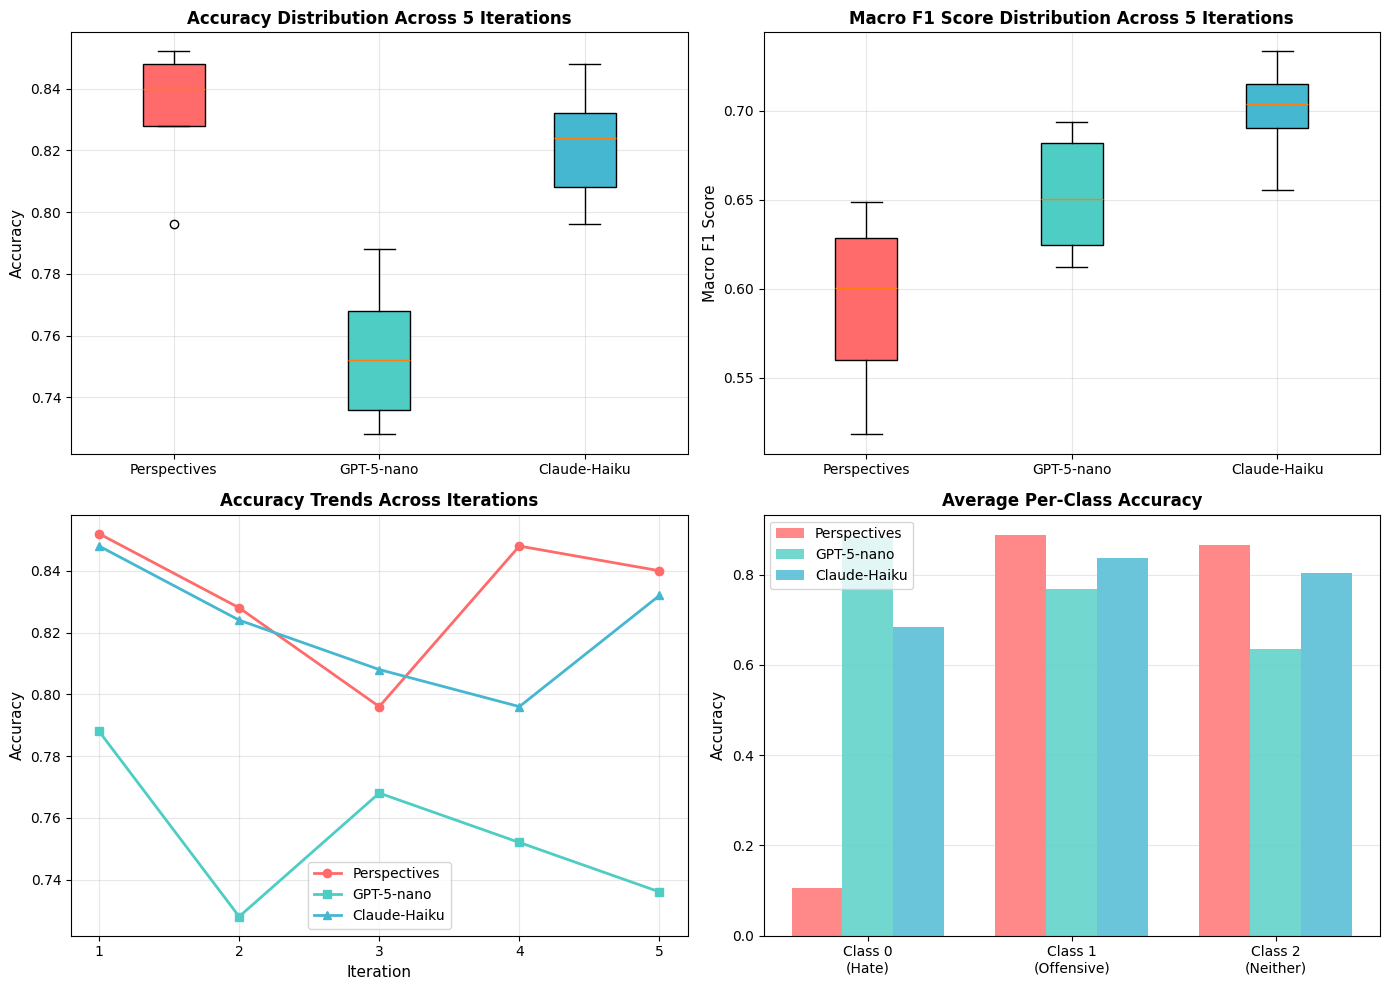


✓ Visualizations generated!


In [29]:
import matplotlib.pyplot as plt

# Prepare data for visualization
perspectives_accs = [r['perspectives']['accuracy'] for r in all_results]
gpt_accs = [r['gpt']['accuracy'] for r in all_results]
claude_accs = [r['claude']['accuracy'] for r in all_results]

perspectives_f1s = [r['perspectives']['f1_macro'] for r in all_results]
gpt_f1s = [r['gpt']['f1_macro'] for r in all_results]
claude_f1s = [r['claude']['f1_macro'] for r in all_results]

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Accuracy comparison - Box plot
ax1 = axes[0, 0]
data_acc = [perspectives_accs, gpt_accs, claude_accs]
bp1 = ax1.boxplot(data_acc, labels=['Perspectives', 'GPT-5-nano', 'Claude-Haiku'], patch_artist=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Accuracy Distribution Across 5 Iterations', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. F1 Score comparison - Box plot
ax2 = axes[0, 1]
data_f1 = [perspectives_f1s, gpt_f1s, claude_f1s]
bp2 = ax2.boxplot(data_f1, labels=['Perspectives', 'GPT-5-nano', 'Claude-Haiku'], patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Macro F1 Score', fontsize=11)
ax2.set_title('Macro F1 Score Distribution Across 5 Iterations', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Accuracy across iterations - Line plot
ax3 = axes[1, 0]
iterations = [r['iteration'] for r in all_results]
ax3.plot(iterations, perspectives_accs, marker='o', linewidth=2, label='Perspectives', color=colors[0])
ax3.plot(iterations, gpt_accs, marker='s', linewidth=2, label='GPT-5-nano', color=colors[1])
ax3.plot(iterations, claude_accs, marker='^', linewidth=2, label='Claude-Haiku', color=colors[2])
ax3.set_xlabel('Iteration', fontsize=11)
ax3.set_ylabel('Accuracy', fontsize=11)
ax3.set_title('Accuracy Trends Across Iterations', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xticks(iterations)

# 4. Per-class accuracy comparison - Grouped bar chart
ax4 = axes[1, 1]
x = np.arange(3)  # 3 classes
width = 0.25

perspectives_class_accs = [
    np.mean([r['perspectives']['class_0_acc'] for r in all_results]),
    np.mean([r['perspectives']['class_1_acc'] for r in all_results]),
    np.mean([r['perspectives']['class_2_acc'] for r in all_results])
]
gpt_class_accs = [
    np.mean([r['gpt']['class_0_acc'] for r in all_results]),
    np.mean([r['gpt']['class_1_acc'] for r in all_results]),
    np.mean([r['gpt']['class_2_acc'] for r in all_results])
]
claude_class_accs = [
    np.mean([r['claude']['class_0_acc'] for r in all_results]),
    np.mean([r['claude']['class_1_acc'] for r in all_results]),
    np.mean([r['claude']['class_2_acc'] for r in all_results])
]

bars1 = ax4.bar(x - width, perspectives_class_accs, width, label='Perspectives', color=colors[0], alpha=0.8)
bars2 = ax4.bar(x, gpt_class_accs, width, label='GPT-5-nano', color=colors[1], alpha=0.8)
bars3 = ax4.bar(x + width, claude_class_accs, width, label='Claude-Haiku', color=colors[2], alpha=0.8)

ax4.set_ylabel('Accuracy', fontsize=11)
ax4.set_title('Average Per-Class Accuracy', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(['Class 0\n(Hate)', 'Class 1\n(Offensive)', 'Class 2\n(Neither)'])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizations generated!")

## Executive Summary

In [30]:
# Generate executive summary
print("\n" + "="*80)
print("EXECUTIVE SUMMARY - CONTENT MODERATION EXPERIMENT")
print("="*80)

print(f"\n📊 Experiment Details:")
print(f"   • Number of iterations: {num_iterations}")
print(f"   • Tweets per iteration: 250")
print(f"   • Total tweets evaluated: {num_iterations * 250}")
print(f"   • Models compared: Perspectives API, GPT-5-nano, Claude-Haiku")

# Calculate rankings
mean_accs = {
    'Perspectives API': np.mean([r['perspectives']['accuracy'] for r in all_results]),
    'GPT-5-nano': np.mean([r['gpt']['accuracy'] for r in all_results]),
    'Claude-Haiku': np.mean([r['claude']['accuracy'] for r in all_results])
}
mean_f1s = {
    'Perspectives API': np.mean([r['perspectives']['f1_macro'] for r in all_results]),
    'GPT-5-nano': np.mean([r['gpt']['f1_macro'] for r in all_results]),
    'Claude-Haiku': np.mean([r['claude']['f1_macro'] for r in all_results])
}

acc_ranking = sorted(mean_accs.items(), key=lambda x: x[1], reverse=True)
f1_ranking = sorted(mean_f1s.items(), key=lambda x: x[1], reverse=True)

print(f"\n🏆 Overall Rankings by Accuracy:")
for i, (model, acc) in enumerate(acc_ranking, 1):
    print(f"   {i}. {model}: {acc:.4f}")

print(f"\n🏆 Overall Rankings by Macro F1:")
for i, (model, f1) in enumerate(f1_ranking, 1):
    print(f"   {i}. {model}: {f1:.4f}")

# Key findings
print(f"\n💡 Key Findings:")

# Find best model for Class 0 (Hate Speech)
class_0_means = {
    'Perspectives API': np.mean([r['perspectives']['class_0_acc'] for r in all_results]),
    'GPT-5-nano': np.mean([r['gpt']['class_0_acc'] for r in all_results]),
    'Claude-Haiku': np.mean([r['claude']['class_0_acc'] for r in all_results])
}
best_class_0 = max(class_0_means.items(), key=lambda x: x[1])
print(f"   • Best for Hate Speech detection (Class 0): {best_class_0[0]} ({best_class_0[1]:.1%})")

# Find best model for Class 1 (Offensive)
class_1_means = {
    'Perspectives API': np.mean([r['perspectives']['class_1_acc'] for r in all_results]),
    'GPT-5-nano': np.mean([r['gpt']['class_1_acc'] for r in all_results]),
    'Claude-Haiku': np.mean([r['claude']['class_1_acc'] for r in all_results])
}
best_class_1 = max(class_1_means.items(), key=lambda x: x[1])
print(f"   • Best for Offensive Language (Class 1): {best_class_1[0]} ({best_class_1[1]:.1%})")

# Find best model for Class 2 (Neither)
class_2_means = {
    'Perspectives API': np.mean([r['perspectives']['class_2_acc'] for r in all_results]),
    'GPT-5-nano': np.mean([r['gpt']['class_2_acc'] for r in all_results]),
    'Claude-Haiku': np.mean([r['claude']['class_2_acc'] for r in all_results])
}
best_class_2 = max(class_2_means.items(), key=lambda x: x[1])
print(f"   • Best for Safe Content (Class 2): {best_class_2[0]} ({best_class_2[1]:.1%})")

# Variance analysis
print(f"\n📈 Consistency Analysis (Lower std = more consistent):")
for model in ['Perspectives API', 'GPT-5-nano', 'Claude-Haiku']:
    if model == 'Perspectives API':
        accs = [r['perspectives']['accuracy'] for r in all_results]
    elif model == 'GPT-5-nano':
        accs = [r['gpt']['accuracy'] for r in all_results]
    else:
        accs = [r['claude']['accuracy'] for r in all_results]
    print(f"   • {model}: σ = {np.std(accs):.4f}")

print("\n" + "="*80)


EXECUTIVE SUMMARY - CONTENT MODERATION EXPERIMENT

📊 Experiment Details:
   • Number of iterations: 5
   • Tweets per iteration: 250
   • Total tweets evaluated: 1250
   • Models compared: Perspectives API, GPT-5-nano, Claude-Haiku

🏆 Overall Rankings by Accuracy:
   1. Perspectives API: 0.8328
   2. Claude-Haiku: 0.8216
   3. GPT-5-nano: 0.7544

🏆 Overall Rankings by Macro F1:
   1. Claude-Haiku: 0.6997
   2. GPT-5-nano: 0.6526
   3. Perspectives API: 0.5911

💡 Key Findings:
   • Best for Hate Speech detection (Class 0): GPT-5-nano (88.3%)
   • Best for Offensive Language (Class 1): Perspectives API (88.9%)
   • Best for Safe Content (Class 2): Perspectives API (86.5%)

📈 Consistency Analysis (Lower std = more consistent):
   • Perspectives API: σ = 0.0201
   • GPT-5-nano: σ = 0.0217
   • Claude-Haiku: σ = 0.0182

